- Name:  Carka Harrell
- Course: DSC630
- Assignment: Final Project
- Date: 05/30/20

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import re
import seaborn as sns
from array import *
from sklearn import linear_model
from scipy.special import expit

## Import the dataset 

In [2]:
us_data = pd.read_csv("us_covid19_daily.csv")

In [3]:
us_data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200425,56,931698,4252937.0,5315.0,56312.0,94743.0,15020.0,2516.0,5266.0,...,47980.0,94743.0,5189950,5184635,5184635,2194.0,1636.0,259951.0,40882.0,300833.0
1,20200424,56,890816,3992986.0,4396.0,56118.0,93107.0,15078.0,2468.0,5187.0,...,45786.0,93107.0,4888198,4883802,4883802,1772.0,1999.0,192054.0,31498.0,223552.0
2,20200423,56,859318,3800932.0,4258.0,57879.0,91108.0,15163.0,2428.0,5464.0,...,44014.0,91108.0,4664508,4660250,4660250,1886.0,5565.0,159700.0,31355.0,191055.0
3,20200422,56,827963,3641232.0,4191.0,58173.0,85543.0,15341.0,2370.0,5474.0,...,42128.0,85543.0,4473386,4469195,4469195,2133.0,1251.0,285950.0,27658.0,313608.0
4,20200421,56,800305,3355282.0,3956.0,58468.0,84292.0,15228.0,2315.0,5514.0,...,39995.0,84292.0,4159543,4155587,4155587,2674.0,1413.0,124255.0,27285.0,151540.0


## data cleaning and data preprocessing

In [4]:
### first convert the date column to yyyy mm dd format

us_data['New_Date'] = pd.to_datetime(us_data.date, format='%Y%m%d')


In [5]:
### then create a new column No_days which states number of days passed since first outbreak in US

us_data['No_days'] = us_data['New_Date'] - min(us_data['New_Date'])

In [6]:
us_data.head() ## we can see the two new columns in the last of the dataframe

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,New_Date,No_days
0,20200425,56,931698,4252937.0,5315.0,56312.0,94743.0,15020.0,2516.0,5266.0,...,5189950,5184635,5184635,2194.0,1636.0,259951.0,40882.0,300833.0,2020-04-25,94 days
1,20200424,56,890816,3992986.0,4396.0,56118.0,93107.0,15078.0,2468.0,5187.0,...,4888198,4883802,4883802,1772.0,1999.0,192054.0,31498.0,223552.0,2020-04-24,93 days
2,20200423,56,859318,3800932.0,4258.0,57879.0,91108.0,15163.0,2428.0,5464.0,...,4664508,4660250,4660250,1886.0,5565.0,159700.0,31355.0,191055.0,2020-04-23,92 days
3,20200422,56,827963,3641232.0,4191.0,58173.0,85543.0,15341.0,2370.0,5474.0,...,4473386,4469195,4469195,2133.0,1251.0,285950.0,27658.0,313608.0,2020-04-22,91 days
4,20200421,56,800305,3355282.0,3956.0,58468.0,84292.0,15228.0,2315.0,5514.0,...,4159543,4155587,4155587,2674.0,1413.0,124255.0,27285.0,151540.0,2020-04-21,90 days


## EDA (Exploratory Data Analysis)

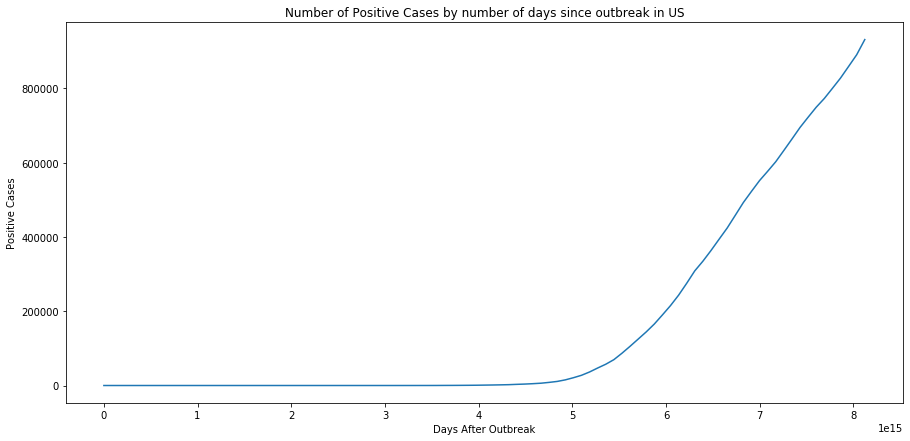

In [7]:
## lets see the number of positive cases by days

plt.figure(figsize=(15,7))

plt.plot(us_data.No_days,us_data.positive)
plt.xlabel('Days After Outbreak')
plt.ylabel('Positive Cases')
plt.title('Number of Positive Cases by number of days since outbreak in US')
plt.show()

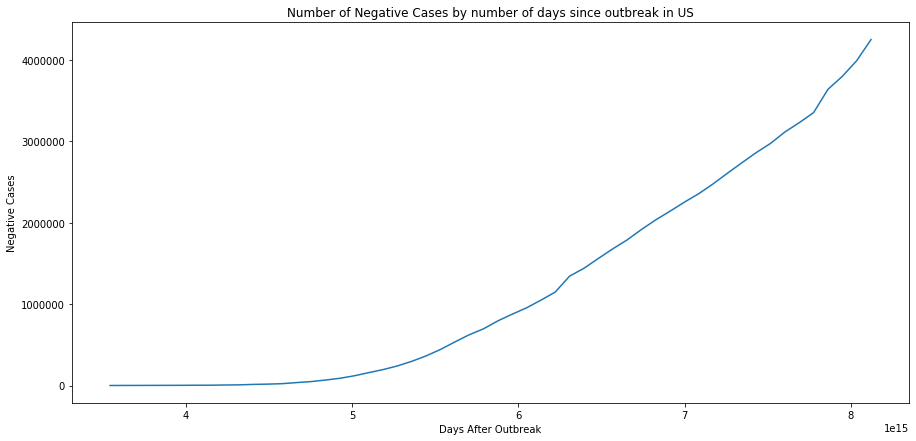

In [8]:
## lets see the number of negative cases by days

plt.figure(figsize=(15,7))

plt.plot(us_data.No_days,us_data.negative)
plt.xlabel('Days After Outbreak')
plt.ylabel('Negative Cases')
plt.title('Number of Negative Cases by number of days since outbreak in US')
plt.show()

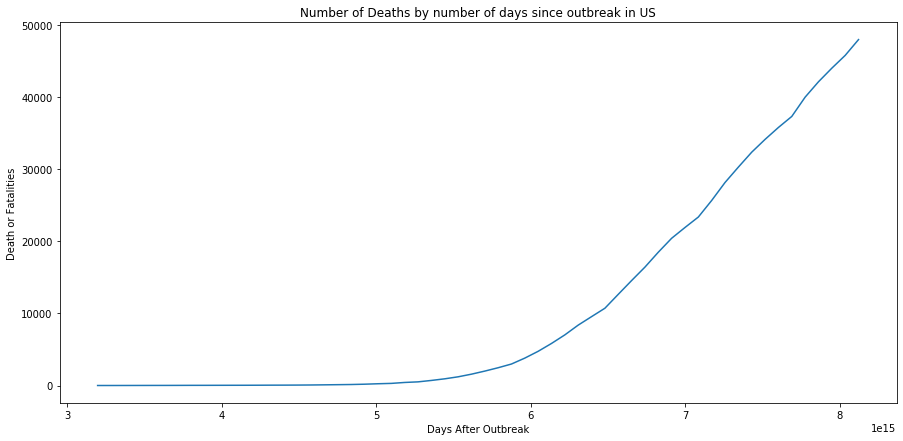

In [9]:
## lets see the number of death cases by days

plt.figure(figsize=(15,7))

plt.plot(us_data.No_days,us_data.death)
plt.xlabel('Days After Outbreak')
plt.ylabel('Death or Fatalities')
plt.title('Number of Deaths by number of days since outbreak in US')
plt.show()

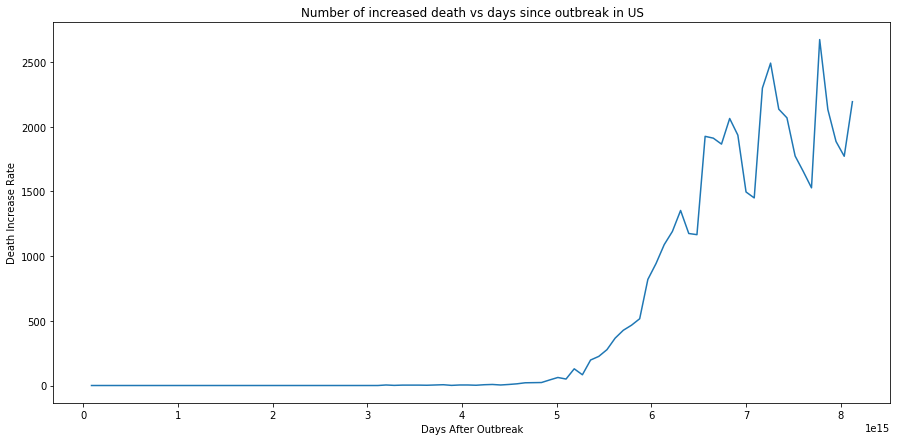

In [10]:
## lets see the death increase rate

plt.figure(figsize=(15,7))

plt.plot(us_data.No_days,us_data.deathIncrease)
plt.xlabel('Days After Outbreak')
plt.ylabel('Death Increase Rate')
plt.title('Number of increased death vs days since outbreak in US')
plt.show()

## Important Insight

Death Increase rate doesn't give us a proper indication of the spread of this outbreak as death depends on individuals immune system
and many other factors.
To actually understand the spread of outbreak we need to calculate the growth factor or spread factor of Covid 19 in United
States.

We can calculate the Spread Factor based on postive cases Increase each day compared to previus day

## Calculation of Spread Factor

In [11]:
## ascending values based on number of days since outbreak

us_data = us_data.sort_values(['No_days'], ascending = True)
us_data = us_data.reset_index(drop=True)

In [12]:
us_data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,New_Date,No_days
0,20200122,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,NaN,NaN,NaN,NaN,NaN,2020-01-22,0 days
1,20200123,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,0.0,0.0,0.0,0.0,0.0,2020-01-23,1 days
2,20200124,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,0.0,0.0,0.0,0.0,0.0,2020-01-24,2 days
3,20200125,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,0.0,0.0,0.0,0.0,0.0,2020-01-25,3 days
4,20200126,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,0.0,0.0,0.0,0.0,0.0,2020-01-26,4 days


In [13]:
## calculating the Spread factor for each day in United States

## initialize the column
us_data['Spread_factor'] = float(0)


for val in range(len(us_data.Spread_factor.tolist())):
    if val <= 1: ### spread factor for first day of outbreak will be 0 as it depends on previous day
        us_data.at[val,'Spread_factor'] = 0
    else:
        us_data.at[val,'Spread_factor'] = us_data.positiveIncrease[val]/us_data.positiveIncrease[val-1]

C:\Users\carla\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\carla\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [14]:
## lets check the values of Spread factor column

us_data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,New_Date,No_days,Spread_factor
0,20200122,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,2020-01-22,0 days,0.0
1,20200123,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0.0,0.0,0.0,0.0,0.0,2020-01-23,1 days,0.0
2,20200124,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0.0,0.0,0.0,0.0,0.0,2020-01-24,2 days,NaN
3,20200125,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0.0,0.0,0.0,0.0,0.0,2020-01-25,3 days,NaN
4,20200126,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0.0,0.0,0.0,0.0,0.0,2020-01-26,4 days,NaN


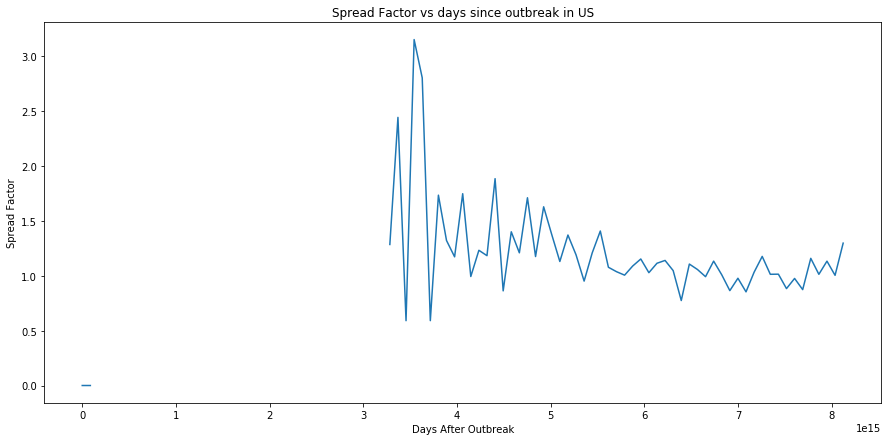

In [15]:
## lets visualize the growth factor since the number of days of outbreak

## lets see the death increase rate

plt.figure(figsize=(15,7))

plt.plot(us_data.No_days,us_data.Spread_factor)
plt.xlabel('Days After Outbreak')
plt.ylabel('Spread Factor')
plt.title('Spread Factor vs days since outbreak in US')
plt.show()

## Importing Statewise data and cleaning it 

In [16]:
us_state = pd.read_csv("us_states_covid19_daily.csv")

In [17]:
us_state.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200425,AK,339.0,15393.0,NaN,32.0,NaN,NaN,NaN,NaN,...,NaN,15732.0,15732.0,15732.0,2,0.0,0.0,3451.0,0.0,3451.0
1,20200425,AL,6137.0,65207.0,NaN,NaN,839.0,NaN,288.0,NaN,...,839.0,71344.0,71344.0,71344.0,1,15.0,71.0,18344.0,305.0,18649.0
2,20200425,AR,2829.0,35224.0,NaN,104.0,291.0,NaN,NaN,25.0,...,291.0,38053.0,38053.0,38053.0,5,2.0,0.0,2387.0,88.0,2475.0
3,20200425,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,20200425,AZ,6280.0,56228.0,NaN,697.0,1022.0,313.0,NaN,191.0,...,1022.0,62508.0,62508.0,62508.0,4,0.0,38.0,1559.0,235.0,1794.0


In [18]:
### first convert the date column to yyyy mm dd format

us_state['New_Date'] = pd.to_datetime(us_state.date, format='%Y%m%d')


In [19]:
### then create a new column No_days which states number of days passed since first outbreak in US

us_state['No_days'] = us_state['New_Date'] - min(us_state['New_Date'])

In [20]:
us_state.drop(columns='New_Date',inplace=True)

In [21]:
us_state.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,No_days
0,20200425,AK,339.0,15393.0,NaN,32.0,NaN,NaN,NaN,NaN,...,15732.0,15732.0,15732.0,2,0.0,0.0,3451.0,0.0,3451.0,94 days
1,20200425,AL,6137.0,65207.0,NaN,NaN,839.0,NaN,288.0,NaN,...,71344.0,71344.0,71344.0,1,15.0,71.0,18344.0,305.0,18649.0,94 days
2,20200425,AR,2829.0,35224.0,NaN,104.0,291.0,NaN,NaN,25.0,...,38053.0,38053.0,38053.0,5,2.0,0.0,2387.0,88.0,2475.0,94 days
3,20200425,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,...,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0,94 days
4,20200425,AZ,6280.0,56228.0,NaN,697.0,1022.0,313.0,NaN,191.0,...,62508.0,62508.0,62508.0,4,0.0,38.0,1559.0,235.0,1794.0,94 days


## Analyze states with most outbreak

### New York , Washington, California, Louisiana, Texas

In [22]:
df_New_York = us_state.loc[us_state['state'] == 'NY']


In [23]:
df_New_York.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,No_days
37,20200425,NY,282143.0,495425.0,NaN,13524.0,57103.0,5016.0,NaN,NaN,...,777568.0,777568.0,777568.0,36,437.0,0.0,36359.0,10553.0,46912.0,94 days
93,20200424,NY,271590.0,459066.0,NaN,14258.0,57103.0,5016.0,NaN,NaN,...,730656.0,730656.0,730656.0,36,422.0,0.0,26606.0,8130.0,34736.0,93 days
149,20200423,NY,263460.0,432460.0,NaN,15021.0,57103.0,5016.0,NaN,NaN,...,695920.0,695920.0,695920.0,36,438.0,0.0,19694.0,6244.0,25938.0,92 days
205,20200422,NY,257216.0,412766.0,NaN,15599.0,57103.0,5016.0,NaN,NaN,...,669982.0,669982.0,669982.0,36,474.0,0.0,15131.0,5526.0,20657.0,91 days
261,20200421,NY,251690.0,397635.0,NaN,16076.0,57103.0,5016.0,NaN,NaN,...,649325.0,649325.0,649325.0,36,481.0,0.0,11286.0,4178.0,15464.0,90 days


In [24]:
df_Washington = us_state.loc[us_state['state'] == 'WA']


In [25]:
df_Texas = us_state.loc[us_state['state'] == 'TX']


In [26]:
df_California = us_state.loc[us_state['state']=='CA']

In [27]:
df_Louisinia = us_state.loc[us_state['state']=='LA']

## Positive Cases comparision in these states

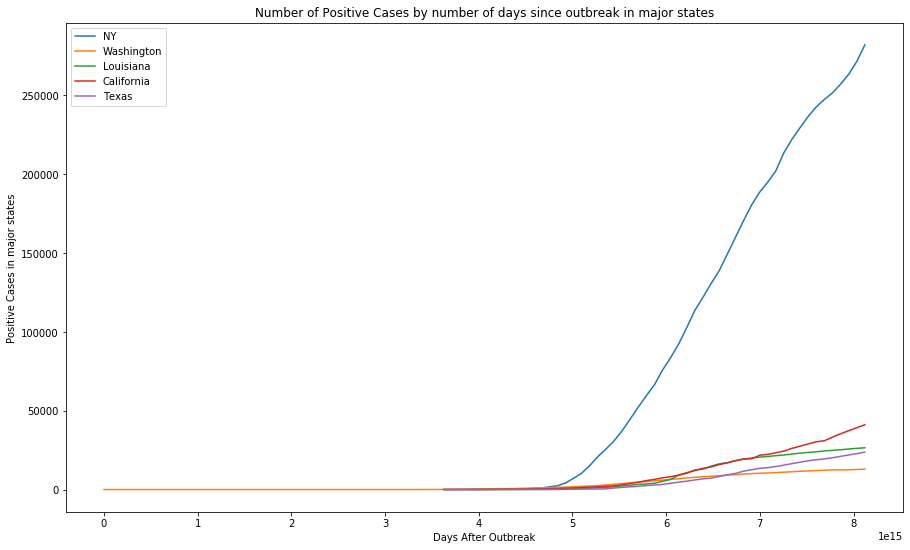

In [28]:
## lets see the number of positive cases by days in major states

plt.figure(figsize=(15,9))
plt.plot(df_New_York.No_days,df_New_York.positive, label="NY")
plt.plot(df_Washington.No_days,df_Washington.positive, label="Washington")
plt.plot(df_Louisinia.No_days,df_Louisinia.positive,label="Louisiana")
plt.plot(df_California.No_days, df_California.positive, label="California")
plt.plot(df_Texas.No_days,df_Texas.positive, label="Texas")

plt.xlabel('Days After Outbreak')
plt.ylabel('Positive Cases in major states')
plt.title('Number of Positive Cases by number of days since outbreak in major states')
plt.legend()
plt.show()

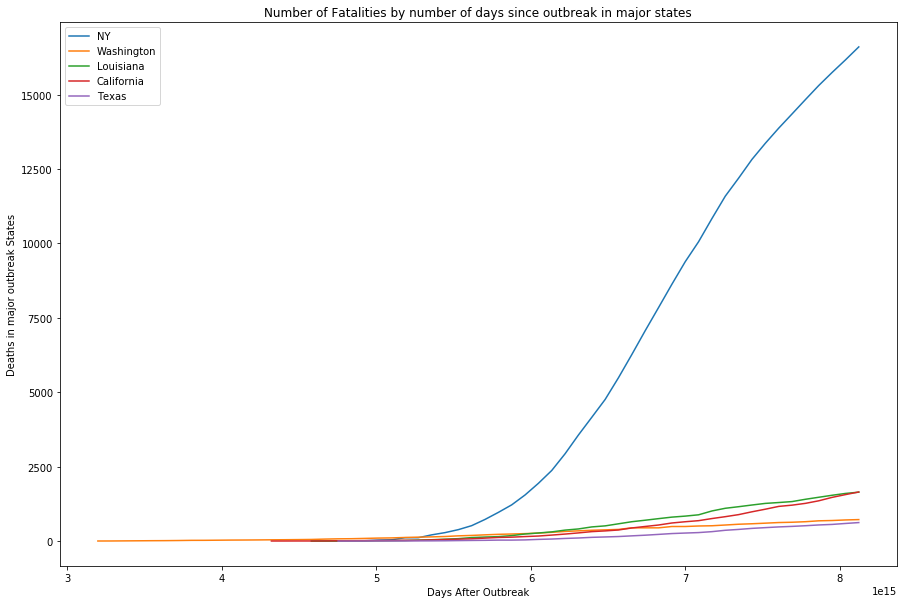

In [29]:
## lets see the number of deaths by days in major states

plt.figure(figsize=(15,10))

plt.plot(df_New_York.No_days,df_New_York.death, label="NY")
plt.plot(df_Washington.No_days,df_Washington.death, label="Washington")
plt.plot(df_Louisinia.No_days,df_Louisinia.death,label="Louisiana")
plt.plot(df_California.No_days, df_California.death, label="California")
plt.plot(df_Texas.No_days,df_Texas.death, label="Texas")

plt.xlabel('Days After Outbreak')
plt.ylabel('Deaths in major outbreak States')
plt.title('Number of Fatalities by number of days since outbreak in major states')
plt.legend()

plt.show()

### Data aggregation for each state

In [30]:
pos_state_cases=pd.DataFrame(us_state.groupby(['state'], sort=False)['positive'].max())

In [31]:
pos_state_cases.head()

,positive
state,
AK,339.0
AL,6137.0
AR,2829.0
AS,0.0
AZ,6280.0


In [32]:
y_pos = np.arange(len(pos_state_cases))


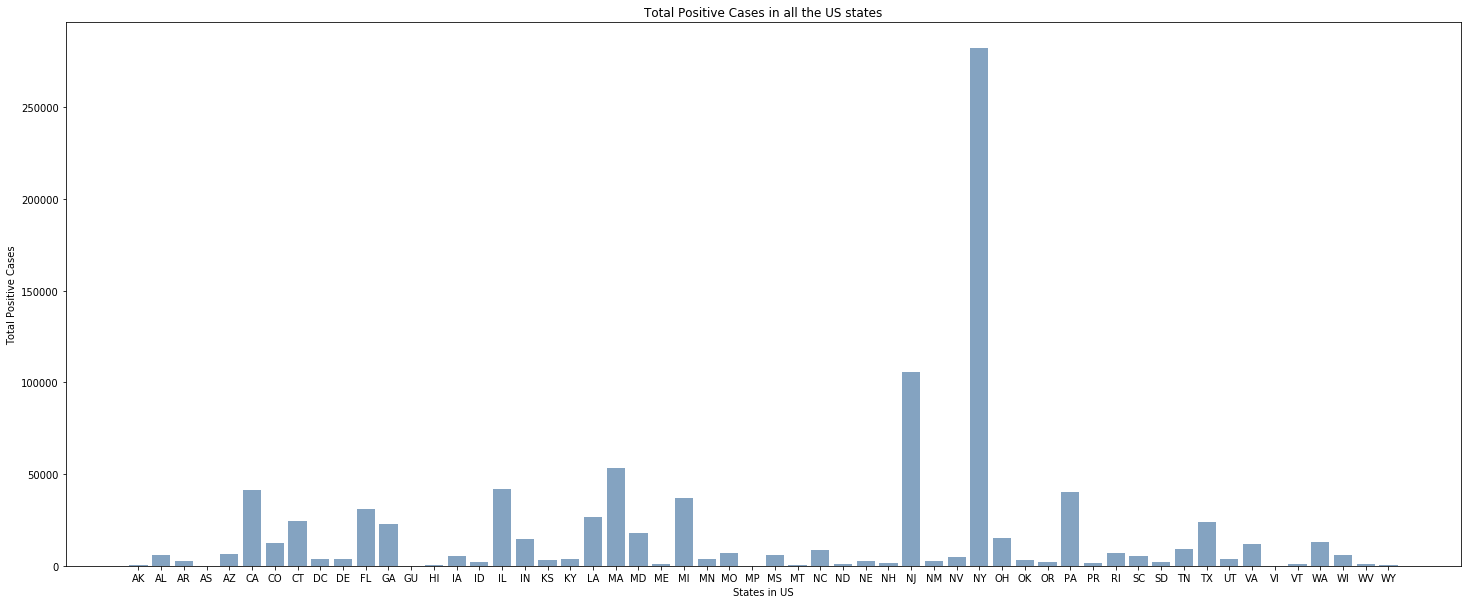

In [33]:
plt.figure(figsize=(25,10))


plt.xlabel('States in US')
plt.ylabel('Total Positive Cases')
plt.title('Total Positive Cases in all the US states')

plt.bar(y_pos, pos_state_cases.positive, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos, pos_state_cases.index)
plt.show()


## Apply Polynomial Regression (including linear Regression on New York (state with the most cases))

In [34]:
df_New_York=df_New_York.sort_values(['No_days'],ascending=True)

In [35]:
df_New_York=df_New_York.reset_index(drop=True)

In [36]:
## calculating the Spread factor for each day in New York

## initialize the column
df_New_York['Spread_factor'] = float(0)


for val in range(len(df_New_York.Spread_factor.tolist())):
    if val <= 1: ### spread factor for first day of outbreak will be 0 as it depends on previous day
        df_New_York.at[val,'Spread_factor'] = 0
    else:
        df_New_York.at[val,'Spread_factor'] = df_New_York.positiveIncrease[val]/df_New_York.positiveIncrease[val-1]

C:\Users\carla\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [37]:
df_New_York.head(10)  ## we can see that few rows of Spread Factor are INF and 0 values

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,No_days,Spread_factor
0,20200304,NY,6.0,48.0,24.0,NaN,NaN,NaN,NaN,NaN,...,54.0,54.0,36,NaN,NaN,NaN,NaN,NaN,42 days,0.000000
1,20200305,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,...,98.0,98.0,36,0.0,0.0,28.0,16.0,44.0,43 days,0.000000
2,20200306,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,...,125.0,125.0,36,0.0,0.0,16.0,11.0,27.0,44 days,0.687500
3,20200307,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,...,168.0,168.0,36,0.0,0.0,0.0,43.0,43.0,45 days,3.909091
4,20200308,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,...,197.0,197.0,36,0.0,0.0,0.0,29.0,29.0,46 days,0.674419
5,20200309,NY,142.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,...,234.0,234.0,36,0.0,0.0,0.0,37.0,37.0,47 days,1.275862
6,20200310,NY,173.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,...,265.0,265.0,36,0.0,0.0,0.0,31.0,31.0,48 days,0.837838
7,20200311,NY,216.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,...,308.0,308.0,36,0.0,0.0,0.0,43.0,43.0,49 days,1.387097
8,20200312,NY,216.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,...,308.0,308.0,36,0.0,0.0,0.0,0.0,0.0,50 days,0.000000
9,20200313,NY,421.0,2779.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3200.0,3200.0,36,0.0,0.0,2687.0,205.0,2892.0,51 days,inf


In [38]:
#working on zeros and INF values in New York Data
df_New_York.at[8, 'Spread_factor'] = (df_New_York.at[6, 'Spread_factor'] + df_New_York.at[7, 'Spread_factor'] + df_New_York.at[10, 'Spread_factor'] + df_New_York.at[11, 'Spread_factor'])/4 
df_New_York.at[9, 'Spread_factor'] = df_New_York.at[8, 'Spread_factor']

In [39]:
## Lets create X column for linear Regression based on Spread Factor

In [40]:
from sklearn.preprocessing import PolynomialFeatures 
  
from sklearn.linear_model import LinearRegression

Regression Degrees: 2
   Spread_factor  Pred_positiveIncrease  Pred_Confirmed
0       1.407836                  14856          296999
1       1.383607                  20554          317553
2       1.360171                  27956          345509
3       1.337529                  37391          382900
4       1.315681                  49194          432094


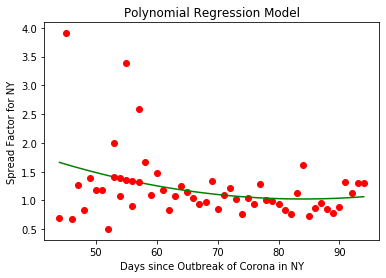

In [41]:
#Creates regression model to predict the next days

def regression_model_NY(future_days, degrees, y, have_plots, df_New_York):

    global x
    x = df_New_York.iloc[:, -2:-1].values

    x = (x / np.timedelta64(1, 'D'))
    #addoffset2 = [i * np.timedelta64(microseconds = 10000) for i in [1,2,3]] # list of type datetime.timedelta
    #tmptime + addoffset2
    X = x[:, np.newaxis]
    
    # 2 dimensioanl array for prediction based on future days
    a = np.zeros([future_days,1]).tolist()
    for i in range(len(a)):
        a[i]= [df_New_York.last_valid_index()+1+i]

    # Fitting Linear Regression to the dataset 
    lin_model = LinearRegression() 

    lin_model.fit(x, y)

    #Fitting polynomial regression to the dataset
    global poly
    poly = PolynomialFeatures(degree = degrees) 
    x_poly = poly.fit_transform(x) 

    global linear_model_2
    poly.fit(x_poly, y) 
    linear_model_2 = LinearRegression() 
    linear_model_2.fit(x_poly, y) 

    if have_plots==True:
    # Visualising the Polynomial Regression results 
        plt.scatter(x, y, color = 'red') 

        plt.plot(x, linear_model_2.predict(poly.fit_transform(x)), color = 'green') 
        plt.title('Polynomial Regression Model') 
        plt.xlabel('Days since Outbreak of Corona in NY') 
        plt.ylabel('Spread Factor for NY') 

    #create dataframe for predictions
    #need to create a previous known positive column to start the first prediction since each prediction is based on the last
    reg_ny = {'Spread_factor': linear_model_2.predict(poly.fit_transform(a)).tolist(), 
              'Prev_positiveIncrease': np.array([0] * future_days),
              'Pred_positiveIncrease': np.array([0] * future_days)}
    df_NY_prediction = pd.DataFrame(reg_ny, columns = ['Spread_factor','Prev_positiveIncrease','Pred_positiveIncrease'])
    df_NY_prediction.at[0, 'Prev_positiveIncrease'] = df_New_York.positiveIncrease.iat[-1] 
    , 
    #index 0 is for last known positiveIncrease
    #index 1 is for predicted last positiveIncrease
    for i in range(len(df_NY_prediction.Pred_positiveIncrease.tolist())):
        if i == 0:
            #print(df_NY_prediction.Spread_factor)
            df_NY_prediction.at[i,'Pred_positiveIncrease'] = df_NY_prediction.Spread_factor[i]*df_NY_prediction.Prev_positiveIncrease[0]
        else:
            df_NY_prediction.at[i,'Pred_positiveIncrease'] = df_NY_prediction.Spread_factor[i]*df_NY_prediction.Pred_positiveIncrease[i-1]
       # df_NY_prediction['Pred_positiveIncrease'] = df_NY_prediction['Pred_positiveIncrease'].fillna(0)

    #fill in the predicted confirmed column        
    df_NY_prediction['Pred_Confirmed'] = 0
    for i in range(len(df_NY_prediction.Pred_Confirmed.tolist())):
        if i == 0:
            df_NY_prediction.at[i,'Pred_Confirmed'] = df_NY_prediction.Pred_positiveIncrease[i] + df_New_York.positive.iat[-1]
        else:
            df_NY_prediction.at[i,'Pred_Confirmed'] = df_NY_prediction.Pred_positiveIncrease[i] + df_NY_prediction.Pred_Confirmed[i-1]

    
    #Outputs predicted growth factor values and the graph 
        
    if have_plots==True:
        print('Regression Degrees:', degrees)
        print(df_NY_prediction[['Spread_factor', 'Pred_positiveIncrease','Pred_Confirmed']])

        plt.plot(a, linear_model_2.predict(poly.fit_transform(a)), 'ro')
        plt.show()
    
    return df_NY_prediction['Spread_factor']
    
pred_values = regression_model_NY(future_days = 5, degrees = 2,y = df_New_York.iloc[2:, -1].values,have_plots= True, df_New_York = df_New_York.iloc[2:,:])






Testing Model 1 with degree 3 polynomial regression

Regression Degrees: 3
   Spread_factor  Pred_positiveIncrease  Pred_Confirmed
0       1.478054                  15597          297740
1       1.464687                  22844          320584
2       1.449162                  33104          353688
3       1.431676                  47394          401082
4       1.412426                  66940          468022


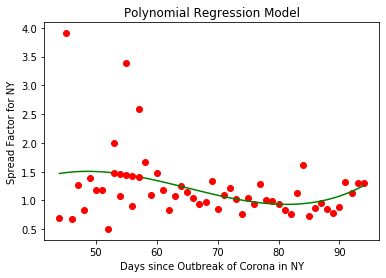

In [42]:
pred_values = regression_model_NY(future_days = 5, degrees = 3,y = df_New_York.iloc[2:, -1].values,have_plots= True, df_New_York = df_New_York.iloc[2:,:])


Testing Model 1 with degree 4 polynomial regression

Regression Degrees: 4
   Spread_factor  Pred_positiveIncrease  Pred_Confirmed
0       1.471335                  15527          297670
1       1.458353                  22643          320313
2       1.443475                  32684          352997
3       1.426841                  46634          399631
4       1.408592                  65688          465319


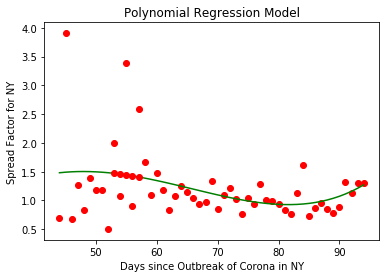

In [43]:
pred_values = regression_model_NY(future_days = 5, degrees = 4,y = df_New_York.iloc[2:, -1].values,have_plots= True, df_New_York = df_New_York.iloc[2:,:])


 - This model come up with the prediction for spread factor for next 5 days for New York city. Will try validate whether this would be actually the case. For this purpose we do the following Model Validation step

# Model Validation through test data 

 - The idea is to remove last 5 day's spread factor value from the training dataset and allow the model to learn without the last 5 day's values. Then this model is used to come up with predictions of the 5 days that were removed from the dataset.The predicitions is compared to what had happened in actual by calculating different error metrics like calculate the root mean squared error and mean absolute percentage error(MAPE). Ideally, a mape of <35-40% would categorise the model as a good predictive model.
 
 - The following exercise is done to validate our model. I am trying to implement the exact same thing as stated in the above paragraph.
  
  

In [44]:
def root_mean_squared_error(true,pred):
    
    true = np.array(true)
    pred = np.array(pred)
    
    mse = np.mean((true-pred)**2)
    rmse = mse**0.5

    return rmse

def mean_absolute_percentage_error(true,pred):
    true = np.array(true)
    pred = np.array(pred)
    
    mape_val = np.mean(abs(true-pred)/true)
    return mape_val

In [45]:

test_pred_values = regression_model_NY(future_days = 5, degrees = 2,y = df_New_York.iloc[2:-5, -1].values,have_plots= False, df_New_York = df_New_York.iloc[2:-5,:])
test_act_values = df_New_York["Spread_factor"].iloc[-5:]

In [46]:
test_pred_values,test_act_values

(0    1.514990
 1    1.495903
 2    1.476981
 3    1.458223
 4    1.439630
 Name: Spread_factor, dtype: float64,
 48    0.884046
 49    1.322642
 50    1.129931
 51    1.302050
 52    1.298032
 Name: Spread_factor, dtype: float64)

In [47]:
rmse = root_mean_squared_error(test_act_values,test_pred_values)

print(f"The root mean squared value is {round(rmse,4)}")

The root mean squared value is 0.3444


In [48]:
mape = mean_absolute_percentage_error(test_act_values,test_pred_values)

print("The mean absolte percentage error is is {round(mape*100,2)}%")

The mean absolte percentage error is is {round(mape*100,2)}%


This model gives a mape of 32.45% which is a good number as expected. However, this would get better as and when more data gets added and is used in the model which is the beauty of machine learning model that models get better with more data.

### we can see the Spread Factor to decline in future for NY based on our polynomial regression output.

Now we evaluate the same model on Degree 3 Polynomial regression

In [49]:

test_pred_values = regression_model_NY(future_days = 5, degrees = 3,y = df_New_York.iloc[2:-5, -1].values,have_plots= False, df_New_York = df_New_York.iloc[2:-5,:])
test_act_values = df_New_York["Spread_factor"].iloc[-5:]

In [50]:
test_pred_values,test_act_values

(0    1.504655
 1    1.500093
 2    1.493367
 3    1.484611
 4    1.473958
 Name: Spread_factor, dtype: float64,
 48    0.884046
 49    1.322642
 50    1.129931
 51    1.302050
 52    1.298032
 Name: Spread_factor, dtype: float64)

In [51]:
rmse = root_mean_squared_error(test_act_values,test_pred_values)

print(f"The root mean squared value is {round(rmse,4)}")

The root mean squared value is 0.3501


In [52]:
mape = mean_absolute_percentage_error(test_act_values,test_pred_values)

print(f"The mean absolte percentage error is is {round(mape*100,2)}%")

The mean absolte percentage error is is 28.67%


Evaluate the same model on Degree 4 Polynomial regression

In [53]:
test_pred_values = regression_model_NY(future_days = 5, degrees = 4,y = df_New_York.iloc[2:-5, -1].values,have_plots= False, df_New_York = df_New_York.iloc[2:-5,:])
test_act_values = df_New_York["Spread_factor"].iloc[-5:]

In [54]:
test_pred_values,test_act_values

(0    1.521653
 1    1.525744
 2    1.524273
 3    1.517872
 4    1.507145
 Name: Spread_factor, dtype: float64,
 48    0.884046
 49    1.322642
 50    1.129931
 51    1.302050
 52    1.298032
 Name: Spread_factor, dtype: float64)

In [55]:
rmse = root_mean_squared_error(test_act_values,test_pred_values)

print(f"The root mean squared value is {round(rmse,4)}")

The root mean squared value is 0.3725


In [56]:
mape = mean_absolute_percentage_error(test_act_values,test_pred_values)

print(f"The mean absolte percentage error is is {round(mape*100,2)}%")

The mean absolte percentage error is is 31.01%


### Correlation Matrix

In [57]:
import seaborn as sn
import matplotlib.pyplot as plt

In [58]:
corrMatrix = df_New_York.corr()
print (corrMatrix)

                              date  positive  negative   pending  \
date                      1.000000  0.940495  0.916844  0.894427   
positive                  0.940495  1.000000  0.993931  0.780471   
negative                  0.916844  0.993931  1.000000  0.834622   
pending                   0.894427  0.780471  0.834622  1.000000   
hospitalizedCurrently     0.863708  0.651847  0.524546       NaN   
hospitalizedCumulative    0.904263  0.996516  0.975516       NaN   
inIcuCurrently            0.939154  0.875207  0.791955       NaN   
inIcuCumulative                NaN       NaN       NaN       NaN   
onVentilatorCurrently          NaN       NaN       NaN       NaN   
onVentilatorCumulative         NaN       NaN       NaN       NaN   
recovered                 0.837674  0.953752  0.894183       NaN   
death                     0.855197  0.981694  0.982472       NaN   
hospitalized              0.904263  0.996516  0.975516       NaN   
total                     0.927516  0.997775  0.

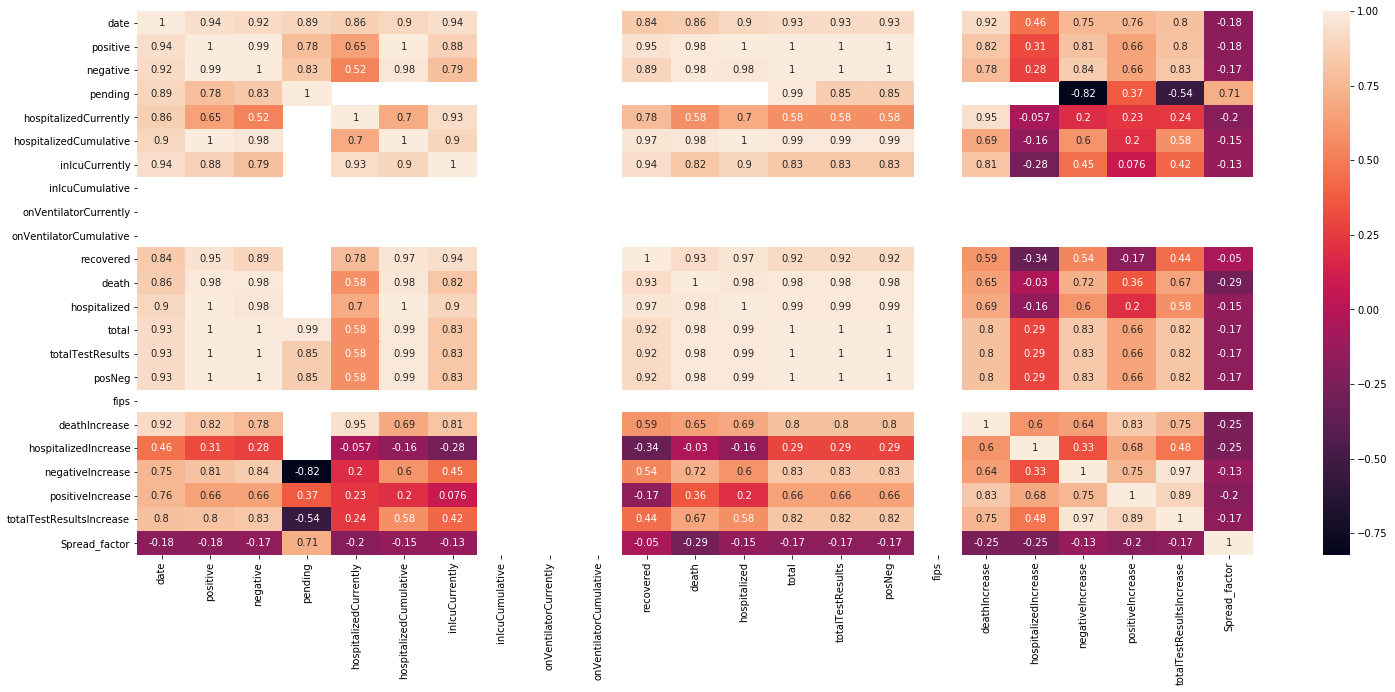

In [59]:
# Correlation Matrix
plt.figure(figsize=(25,10))

sn.heatmap(corrMatrix, annot=True)

plt.show()

In [60]:
### The above matrix gives an idea of how different attributes are correlated to each other

In [61]:
########################End because of the updates####################

## LINEAR REGRESSION MODEL 2

### Import dataset

In [62]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
lastupdate_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-08-2020.csv')
latest_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])
Country_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")


In [63]:
# Read Top 2 Rows of latest_data 
latest_data.head(2)

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,Province_State,FIPS,UID,iso3,Report_Date_String
0,Afghanistan,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020/01/22
1,Afghanistan,2020-01-23,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020/01/23


In [64]:

# Read Top 2 Rows of deaths_df 
deaths_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,246
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,33


In [65]:
# Read Top 2 Rows of deaths_df 
recoveries_df.head(2)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,930,938,996,1040,1075,1097,1128,1138,1209,1259
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,758,771,777,783,789,795,803,812,823,851


In [66]:
# Read Top 2 Rows of lastupdate_data
lastupdate_data.head(2)


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-08 22:51:58,34.223334,-82.461707,5,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-08 22:51:58,30.295065,-92.414197,86,2,0,0,"Acadia, Louisiana, US"


In [67]:
# Read Top 2 Rows of confirmed_df 
confirmed_df.head(2)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099


In [68]:
# Read Top 2 Rows of Country_df 
Country_df.head(2)


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-05-30 08:32:43,-25.0000,133.0000,7185.0,103.0,6606.0,476.0,28.221071,NaN,NaN,1.433542,36,AUS
1,Austria,2020-05-30 08:32:43,47.5162,14.5501,16655.0,668.0,15347.0,640.0,184.924054,NaN,NaN,4.010808,40,AUT


### Preprocessing
#### Rename Columns

In [69]:

confirmed_df = confirmed_df.rename(columns={"Province/State":"state","Country/Region": "country"})
deaths_df = deaths_df.rename(columns={"Province/State":"state","Country/Region": "country"})
recoveries_df = recoveries_df.rename(columns={"Province/State":"state","Country/Region": "country"})
Country_df = Country_df.rename(columns={"Country_Region": "country"})
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['country'] == "US", "country"] = "USA"
deaths_df.loc[deaths_df['country'] == "US", "country"] = "USA"
Country_df.loc[Country_df['country'] == "US", "country"] = "USA"
recoveries_df.loc[recoveries_df['country'] == "US", "country"] = "USA"
latest_data.loc[latest_data['Country_Region'] == "US", "Country_Region"] = "USA"
dates1 = confirmed_df.columns[4:]

confirmed_df1 = confirmed_df.melt(id_vars=['state', 'country', 'Lat', 'Long'], 
                            value_vars=dates1, var_name='Date', value_name='Confirmed')

deaths_df1 = deaths_df.melt(id_vars=['state', 'country', 'Lat', 'Long'], 
                            value_vars=dates1, var_name='Date', value_name='Deaths')

recoveries_df1 = recoveries_df.melt(id_vars=['state', 'country', 'Lat', 'Long'], 
                            value_vars=dates1, var_name='Date', value_name='Recovered')
# getting all countries
countries = np.asarray(confirmed_df["country"])
countries1 = np.asarray(Country_df["country"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting Continent Information
confirmed_df.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
deaths_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
Country_df.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
latest_data.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in latest_data["Country_Region"].values])
#recoveries_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]] )  



In [70]:
# Handaling Missing data
confirmed_df = confirmed_df.replace(np.nan, '', regex=True)
deaths_df = deaths_df.replace(np.nan, '', regex=True)
Full_data = pd.merge(left=confirmed_df1, right=deaths_df1, how='left',
                      on=['state', 'country', 'Date', 'Lat', 'Long'])
Full_data = pd.merge(left=Full_data, right=recoveries_df1, how='left',
                      on=['state', 'country', 'Date', 'Lat', 'Long'])
# Active Case = confirmed - deaths - recovered
Full_data['Active'] = Full_data['Confirmed'] - Full_data['Deaths'] - Full_data['Recovered']
Full_data.head(5)

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0,0.0


In [71]:
# Handaling Missing data
Full_data=Full_data.dropna(subset=['Long'])
Full_data=Full_data.dropna(subset=['Lat'])
# latest condensed
#latest_grouped = lastupdate_data.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
latest_grouped = Country_df.groupby('country')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

C:\Users\carla\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [72]:
len(Full_data)

34314

In [73]:
Full_data.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0,0.0


In [74]:
Full_data.loc[Full_data.country=="USA"]

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
225,NaN,USA,37.0902,-95.7129,1/22/20,1,0,0.0,1.0
491,NaN,USA,37.0902,-95.7129,1/23/20,1,0,0.0,1.0
757,NaN,USA,37.0902,-95.7129,1/24/20,2,0,0.0,2.0
1023,NaN,USA,37.0902,-95.7129,1/25/20,2,0,0.0,2.0
1289,NaN,USA,37.0902,-95.7129,1/26/20,5,0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
33209,NaN,USA,37.0902,-95.7129,5/25/20,1662302,98219,379157.0,1184926.0
33475,NaN,USA,37.0902,-95.7129,5/26/20,1680913,98912,384902.0,1197099.0
33741,NaN,USA,37.0902,-95.7129,5/27/20,1699176,100417,391508.0,1207251.0
34007,NaN,USA,37.0902,-95.7129,5/28/20,1721753,101616,399991.0,1220146.0


In [75]:
grouped_single = Full_data.groupby('country').agg({'Confirmed': ['max'],'Deaths': ['max']})


In [76]:
grouped_single

,Confirmed,Deaths
,max,max
country,,
Afghanistan,13659,246
Albania,1099,33
Algeria,9134,638
Andorra,764,51
Angola,81,4
...,...,...
West Bank and Gaza,446,3
Western Sahara,9,1


In [77]:
### import country population data 2020

population_df = pd.read_csv("population_by_country_2020.csv")

In [78]:
population_df.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%


In [79]:
### change the name from United states to USA
population_df.loc[population_df['Country (or dependency)'] == "United States", "Country (or dependency)"] = "USA"


In [80]:
### join this with full data

final_df =pd.merge(grouped_single, population_df, how='left',  left_on='country', right_on='Country (or dependency)')

C:\Users\carla\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [81]:
len(final_df)

188

In [82]:
final_df.head()

,"(Confirmed, max)","(Deaths, max)",Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,13659,246,Afghanistan,38928346.0,2.33%,886592.0,60.0,652860.0,-62920.0,4.6,18,25%,0.50%
1,1099,33,Albania,2877797.0,-0.11%,-3120.0,105.0,27400.0,-14000.0,1.6,36,63%,0.04%
2,9134,638,Algeria,43851044.0,1.85%,797990.0,18.0,2381740.0,-10000.0,3.1,29,73%,0.56%
3,764,51,Andorra,77265.0,0.16%,123.0,164.0,470.0,NaN,N.A.,N.A.,88%,0.00%
4,81,4,Angola,32866272.0,3.27%,1040977.0,26.0,1246700.0,6413.0,5.6,17,67%,0.42%


In [83]:
final_df=final_df.dropna(subset=['Country (or dependency)'])


In [84]:
len(final_df)

174

In [85]:
final_df.head()

,"(Confirmed, max)","(Deaths, max)",Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,13659,246,Afghanistan,38928346.0,2.33%,886592.0,60.0,652860.0,-62920.0,4.6,18,25%,0.50%
1,1099,33,Albania,2877797.0,-0.11%,-3120.0,105.0,27400.0,-14000.0,1.6,36,63%,0.04%
2,9134,638,Algeria,43851044.0,1.85%,797990.0,18.0,2381740.0,-10000.0,3.1,29,73%,0.56%
3,764,51,Andorra,77265.0,0.16%,123.0,164.0,470.0,NaN,N.A.,N.A.,88%,0.00%
4,81,4,Angola,32866272.0,3.27%,1040977.0,26.0,1246700.0,6413.0,5.6,17,67%,0.42%


In [86]:
### this will serve as training data for our linear regression model

## lets drop the column not requrired
final_df.drop(final_df.columns[[4,5,7,8,9,11,12]], axis=1, inplace=True)


In [87]:
final_df.head()

,"(Confirmed, max)","(Deaths, max)",Country (or dependency),Population (2020),Density (P/Km²),Med. Age
0,13659,246,Afghanistan,38928346.0,60.0,18
1,1099,33,Albania,2877797.0,105.0,36
2,9134,638,Algeria,43851044.0,18.0,29
3,764,51,Andorra,77265.0,164.0,N.A.
4,81,4,Angola,32866272.0,26.0,17


In [88]:
################## create a linear model on this 


from sklearn.linear_model import LinearRegression

In [89]:
X= final_df.drop(final_df.columns[[0,2]],axis=1)

In [90]:
X.head()

,"(Deaths, max)",Population (2020),Density (P/Km²),Med. Age
0,246,38928346.0,60.0,18
1,33,2877797.0,105.0,36
2,638,43851044.0,18.0,29
3,51,77265.0,164.0,N.A.
4,4,32866272.0,26.0,17


In [91]:
X.rename(columns={X.columns[0]: "Deaths",X.columns[1]:"Population",X.columns[2]:"Density",X.columns[3]:"Medain_Age" }, inplace = True)

In [92]:
lm=LinearRegression()

In [93]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
final_df.rename(columns={ final_df.columns[0]: "Total_Cases" }, inplace = True)


In [95]:
final_df.head()

,Total_Cases,"(Deaths, max)",Country (or dependency),Population (2020),Density (P/Km²),Med. Age
0,13659,246,Afghanistan,38928346.0,60.0,18
1,1099,33,Albania,2877797.0,105.0,36
2,9134,638,Algeria,43851044.0,18.0,29
3,764,51,Andorra,77265.0,164.0,N.A.
4,81,4,Angola,32866272.0,26.0,17


In [96]:
y=final_df.Total_Cases

In [97]:
y

0      13659
1       1099
2       9134
3        764
4         81
       ...  
182      328
184        9
185      283
186     1057
187      149
Name: Total_Cases, Length: 174, dtype: int64

In [98]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [99]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [100]:
lm_fit=lm.fit(X,y)

In [101]:
lm_fit.coef_

array([ 1.42326944e+01,  6.31627136e-05, -1.29898723e-01, -3.10235887e+02])

In [102]:
## Preparing test data ready.

In [103]:
us_states_pop = pd.read_csv("Us_states_population.csv")

In [104]:
us_states_pop.head()

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,1,California,39937489,0.0096,39557045,37320903,0.0701,0.1194,256.3727
1,2,Texas,29472295,0.0268,28701845,25242679,0.1676,0.0881,112.8204
2,3,Florida,21992985,0.0326,21299325,18845785,0.1670,0.0658,410.1256
3,4,New York,19440469,-0.0052,19542209,19400080,0.0021,0.0581,412.5211
4,5,Pennsylvania,12820878,0.0011,12807060,12711158,0.0086,0.0383,286.5449


In [105]:
us_states_pop.drop(us_states_pop.columns[[0,3,4,5,6,7]], axis=1, inplace=True)


In [106]:
us_states_pop.head()

,State,Pop,density
0,California,39937489,256.3727
1,Texas,29472295,112.8204
2,Florida,21992985,410.1256
3,New York,19440469,412.5211
4,Pennsylvania,12820878,286.5449


In [107]:
us_median_state_age = pd.read_csv("us_states_median_age.csv")

In [108]:
us_median_state_age.head()

,rank,State,Population,MedianAge,MedianAgeMale,MedianAgeFemale
0,1,Maine,1332813,44.6,43.2,45.8
1,2,Vermont,624977,42.9,41.4,44.2
2,3,New Hampshire,1343622,42.7,41.5,44.0
3,4,West Virginia,1829054,42.4,41.0,43.6
4,5,Florida,20598139,41.9,40.3,43.5


In [109]:
us_median_state_age.drop(us_median_state_age.columns[[0,2,4,5]], axis=1, inplace=True)

In [110]:
us_median_state_age.head()

,State,MedianAge
0,Maine,44.6
1,Vermont,42.9
2,New Hampshire,42.7
3,West Virginia,42.4
4,Florida,41.9


In [111]:
us_states_pop_final = pd.merge(us_states_pop,us_median_state_age, how='left',  left_on='State', right_on='State')

In [112]:
us_states_pop_final.head()

,State,Pop,density,MedianAge
0,California,39937489,256.3727,36.3
1,Texas,29472295,112.8204,34.4
2,Florida,21992985,410.1256,41.9
3,New York,19440469,412.5211,38.7
4,Pennsylvania,12820878,286.5449,40.7


In [113]:
## cases in us states

us_state.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,No_days
0,20200425,AK,339.0,15393.0,NaN,32.0,NaN,NaN,NaN,NaN,...,15732.0,15732.0,15732.0,2,0.0,0.0,3451.0,0.0,3451.0,94 days
1,20200425,AL,6137.0,65207.0,NaN,NaN,839.0,NaN,288.0,NaN,...,71344.0,71344.0,71344.0,1,15.0,71.0,18344.0,305.0,18649.0,94 days
2,20200425,AR,2829.0,35224.0,NaN,104.0,291.0,NaN,NaN,25.0,...,38053.0,38053.0,38053.0,5,2.0,0.0,2387.0,88.0,2475.0,94 days
3,20200425,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,...,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0,94 days
4,20200425,AZ,6280.0,56228.0,NaN,697.0,1022.0,313.0,NaN,191.0,...,62508.0,62508.0,62508.0,4,0.0,38.0,1559.0,235.0,1794.0,94 days


In [114]:
#grouping data
grouped_states = us_state.groupby('state').agg({'positive': ['max'],'death': ['max']})

In [115]:
#grouping data
grouped_states.head()

,positive,death
,max,max
state,,
AK,339.0,9.0
AL,6137.0,212.0
AR,2829.0,47.0
AS,0.0,0.0
AZ,6280.0,266.0


In [116]:
##get the states code

state_code = pd.read_csv("states_code.csv")

In [117]:
#looking at data
state_code.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [118]:
states_cases = pd.merge(grouped_states, state_code, how="left",left_on="state", right_on="Abbreviation")

C:\Users\carla\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [119]:
states_cases.head()

,"(positive, max)","(death, max)",State,Abbreviation
0,339.0,9.0,Alaska,AK
1,6137.0,212.0,Alabama,AL
2,2829.0,47.0,Arkansas,AR
3,0.0,0.0,NaN,NaN
4,6280.0,266.0,Arizona,AZ


In [120]:
states_cases.dropna(subset=['State'], inplace=True)

In [121]:
len(states_cases)

51

In [122]:
us_states_pop_final.head()

,State,Pop,density,MedianAge
0,California,39937489,256.3727,36.3
1,Texas,29472295,112.8204,34.4
2,Florida,21992985,410.1256,41.9
3,New York,19440469,412.5211,38.7
4,Pennsylvania,12820878,286.5449,40.7


In [123]:
#creating dataframe
test_states = pd.merge(states_cases,us_states_pop_final,left_on="State",right_on="State",how="left")

In [124]:
#looking at the dataframe
test_states.head()

,"(positive, max)","(death, max)",State,Abbreviation,Pop,density,MedianAge
0,339.0,9.0,Alaska,AK,734002,1.2863,34.0
1,6137.0,212.0,Alabama,AL,4908621,96.9221,38.9
2,2829.0,47.0,Arkansas,AR,3038999,58.4030,37.9
3,6280.0,266.0,Arizona,AZ,7378494,64.9550,37.4
4,41137.0,1651.0,California,CA,39937489,256.3727,36.3


In [125]:
#renaming columns
test_states.rename(columns={test_states.columns[0]: "Total_Cases",test_states.columns[1]:"Deaths",test_states.columns[4]:"Population",test_states.columns[5]:"Density",test_states.columns[6]:"Medain_Age" }, inplace = True)

In [126]:
#looking at dataframe
test_states.head()

,Total_Cases,Deaths,State,Abbreviation,Population,Density,Medain_Age
0,339.0,9.0,Alaska,AK,734002,1.2863,34.0
1,6137.0,212.0,Alabama,AL,4908621,96.9221,38.9
2,2829.0,47.0,Arkansas,AR,3038999,58.4030,37.9
3,6280.0,266.0,Arizona,AZ,7378494,64.9550,37.4
4,41137.0,1651.0,California,CA,39937489,256.3727,36.3


In [127]:
#naming test data
X_test= test_states.drop(test_states.columns[[0,2,3]],axis=1)

In [128]:
#naming
y_test = test_states.Total_Cases

In [129]:
# creating linear model
y_pred=lm_fit.predict(X_test)

In [130]:
from sklearn import metrics

In [131]:
print(metrics.mean_absolute_error(y_test,y_pred))

6406.811598857804


In [132]:
print(metrics.mean_squared_error(y_test,y_pred))

99596484.08658408


Text(0, 0.5, 'Population')

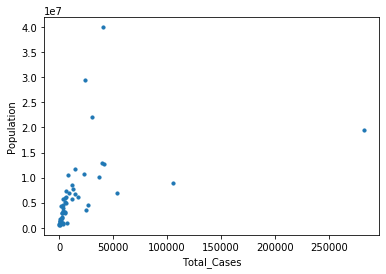

In [133]:
plt.scatter(test_states.Total_Cases, test_states.Population, s=10)
plt.xlabel('Total_Cases')
plt.ylabel('Population')

In [134]:
#naming test data
X_test= test_states.drop(test_states.columns[[0,2,3]],axis=1)

#naming
y_test = test_states.Medain_Age

# creating linear model
y_pred=lm_fit.predict(X_test)

from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

print(metrics.mean_squared_error(y_test,y_pred))







12817.768496186587
1362885423.6272116
